# Rafiu Ali
rafiuali2002@gmail.com

# Credit Card Fraud Detction 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [40]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
# Load Dataset
df = pd.read_csv("D:\\Datascience jpy\\Credit Card Fraud Detct\\creditcard.csv")

In [3]:
# Display the total rows and columns
print(f'Total rows: {df.shape[0]}, Total columns: {df.shape[1]}')

Total rows: 284807, Total columns: 31


In [4]:
# Display the column names
print('Column names:', df.columns.tolist())

Column names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [5]:
# Display the first few rows of the dataset
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
print('Last few rows of the dataset:')
print(df.tail())

Last few rows of the dataset:
            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  

In [7]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
# Display basic statistics of the dataset
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

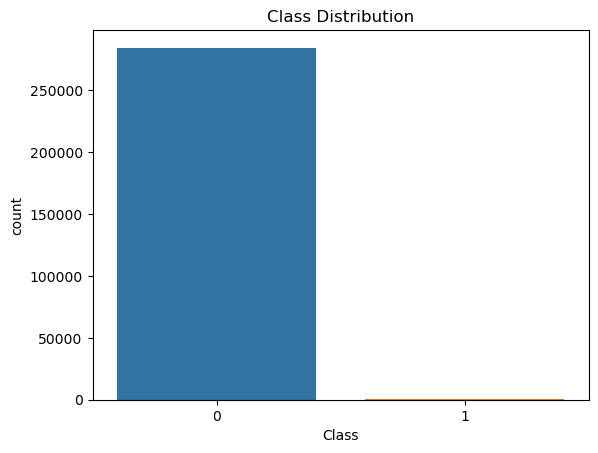

In [9]:
# Plot the distribution of the 'Class' column
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

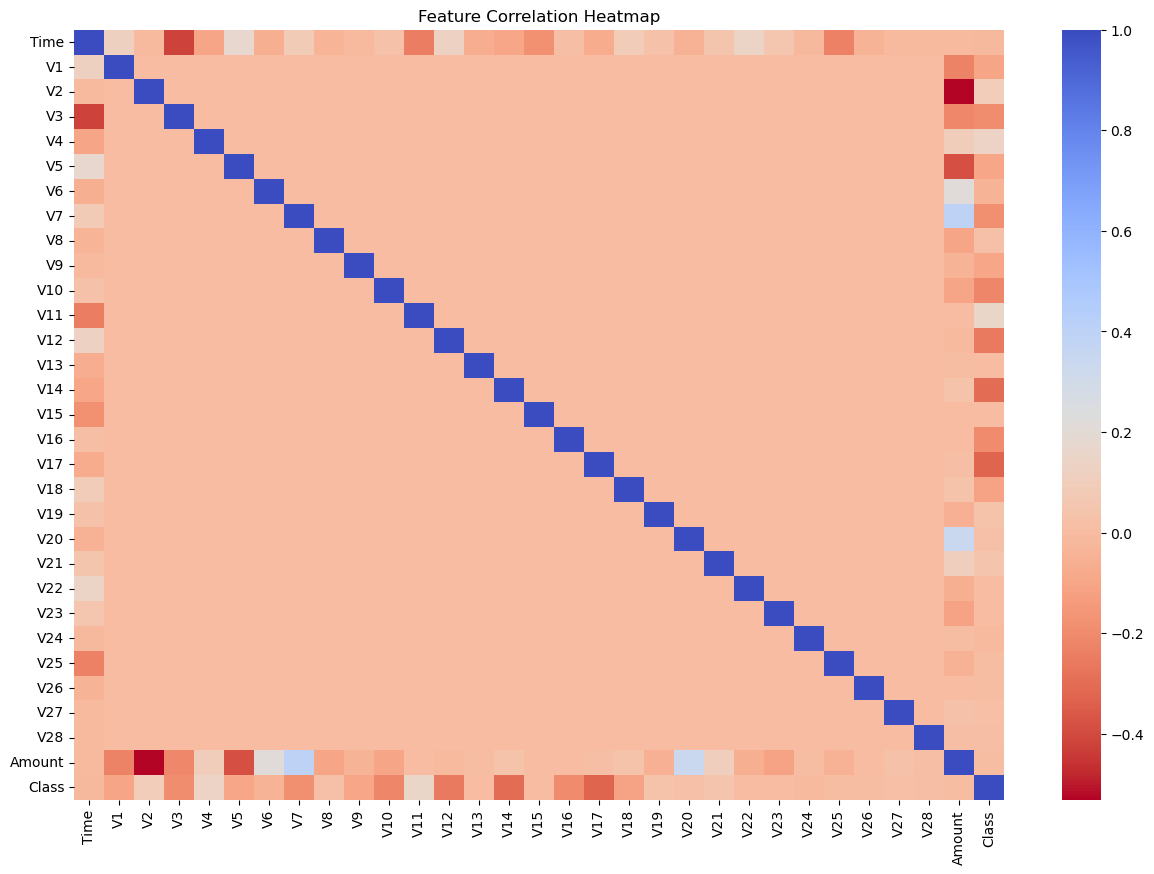

In [10]:
# Plot a heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Data Preprocessing

In [21]:
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [12]:
# Define features and target variable
X = df.drop(['Class', 'Amount'], axis=1)
y = df['Class']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [14]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [15]:
# Train Decision Tree model
dec_tree = DecisionTreeClassifier(class_weight='balanced')
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [16]:
# Train Random Forest model
rand_forest = RandomForestClassifier(class_weight='balanced')
rand_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [17]:
# Train Gradient Boosting model
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [35]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"First few rows of X_test:\n{X_test.head()}")
print(f"First few rows of y_test:\n{y_test.head()}")

X_test shape: (56962, 30)
y_test shape: (56962,)
First few rows of X_test:
            Time         V1        V2         V3        V4         V5  \
43428    41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819   
49906    44261.0   0.339812 -2.743745  -0.134070 -1.385729  -1.451413   
29474    35484.0   1.399590 -0.590701   0.168619 -1.029950  -0.539806   
276481  167123.0  -0.432071  1.647895  -1.669361 -0.349504   0.785785   
278846  168473.0   2.014160 -0.137394  -1.015839  0.327269  -0.182179   

              V6         V7        V8        V9  ...       V20       V21  \
43428  -2.832404 -16.701694  7.517344 -8.507059  ... -1.514923  1.190739   
49906   1.015887  -0.524379  0.224060  0.899746  ...  0.506044 -0.213436   
29474   0.040444  -0.712567  0.002299 -0.971747  ...  0.212877  0.102398   
276481 -0.630647   0.276990  0.586025 -0.484715  ... -0.244633  0.358932   
278846 -0.956571   0.043241 -0.160746  0.363241  ... -0.255293 -0.238644   

             V22       V23   

In [36]:
print(f"Logistic Regression is fitted: {hasattr(log_reg, 'coef_')}")
print(f"Decision Tree is fitted: {hasattr(dec_tree, 'tree_')}")
print(f"Random Forest is fitted: {hasattr(rand_forest, 'estimators_')}")
print(f"Gradient Boosting is fitted: {hasattr(grad_boost, 'estimators_')}")

Logistic Regression is fitted: True
Decision Tree is fitted: True
Random Forest is fitted: True
Gradient Boosting is fitted: True


In [37]:
# Function to evaluate models
def evaluate_model(model):
    print(f"Evaluating {model.__class__.__name__}...")
    y_pred = model.predict(X_test)
    print(f"Predictions for {model.__class__.__name__} done.")
    print(f'Classification Report for {model.__class__.__name__}:\n{classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix for {model.__class__.__name__}:\n{confusion_matrix(y_test, y_pred)}')
    return y_pred

# Call the evaluate_model function for each model
y_pred_log_reg = evaluate_model(log_reg)
y_pred_dec_tree = evaluate_model(dec_tree)
y_pred_rand_forest = evaluate_model(rand_forest)
y_pred_grad_boost = evaluate_model(grad_boost)

Evaluating LogisticRegression...
Predictions for LogisticRegression done.
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.90      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix for LogisticRegression:
[[54832  2032]
 [   10    88]]
Evaluating DecisionTreeClassifier...
Predictions for DecisionTreeClassifier done.
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.73      0.72        98

    accuracy                           1.00     56962
   macro avg       0.86      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix for D

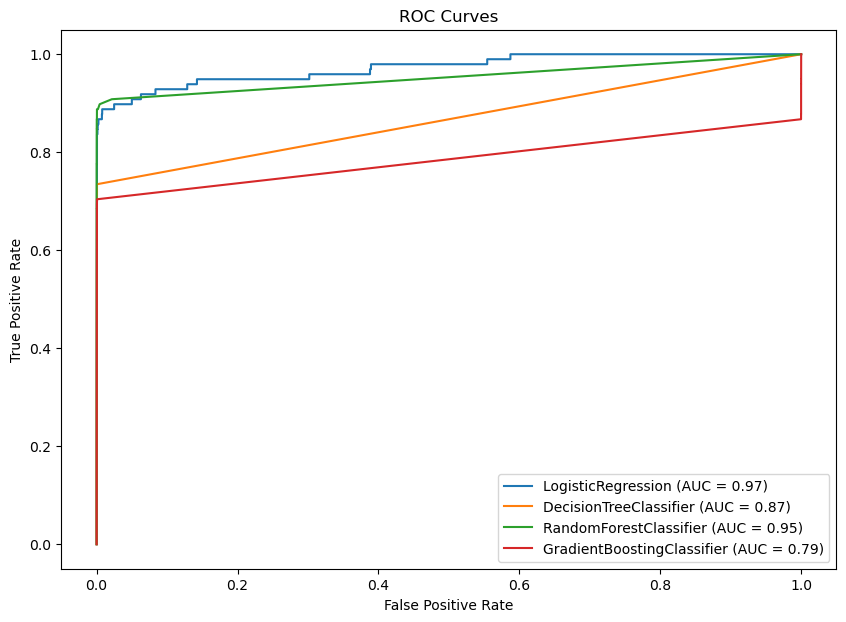

In [38]:
# Plot ROC Curve for each model
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.figure(figsize=(10, 7))
plot_roc_curve(log_reg, X_test, y_test)
plot_roc_curve(dec_tree, X_test, y_test)
plot_roc_curve(rand_forest, X_test, y_test)
plot_roc_curve(grad_boost, X_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

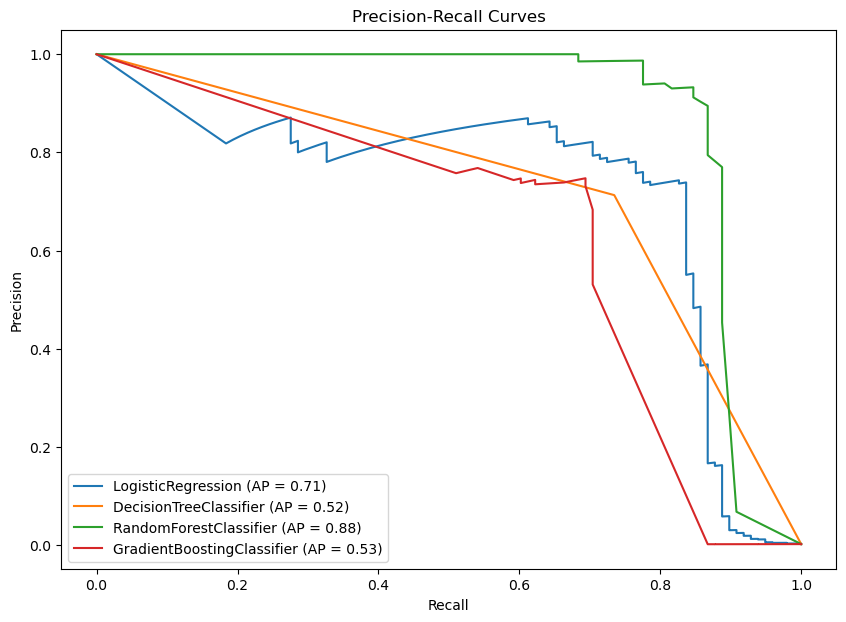

In [41]:

# Plot Precision-Recall Curve for each model
def plot_precision_recall_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f'{model.__class__.__name__} (AP = {average_precision_score(y_test, y_prob):.2f})')

plt.figure(figsize=(10, 7))
plot_precision_recall_curve(log_reg, X_test, y_test)
plot_precision_recall_curve(dec_tree, X_test, y_test)
plot_precision_recall_curve(rand_forest, X_test, y_test)
plot_precision_recall_curve(grad_boost, X_test, y_test)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

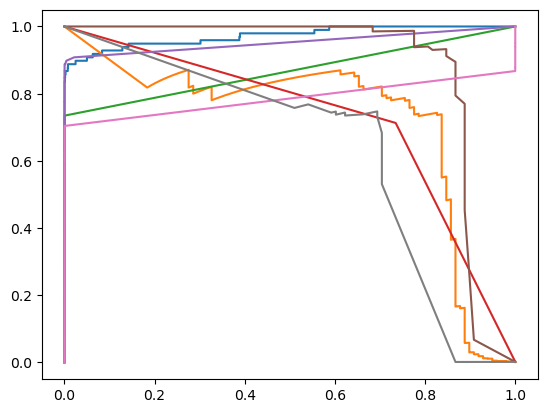

In [46]:
# Call the plot functions for each model
plot_roc_curve(log_reg, X_test, y_test)
plot_precision_recall_curve(log_reg, X_test, y_test)

plot_roc_curve(dec_tree, X_test, y_test)
plot_precision_recall_curve(dec_tree, X_test, y_test)

plot_roc_curve(rand_forest, X_test, y_test)
plot_precision_recall_curve(rand_forest, X_test, y_test)

plot_roc_curve(grad_boost, X_test, y_test)
plot_precision_recall_curve(grad_boost, X_test, y_test)

In [48]:
# Plot ROC and Precision-Recall Curves for each model
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

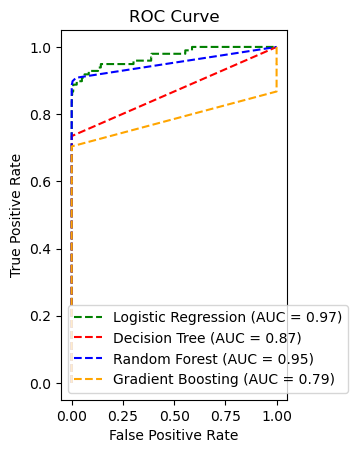

In [49]:
# ROC Curve
plt.subplot(1, 2, 1)
plot_roc_curve(log_reg, X_test, y_test, 'green', 'Logistic Regression')
plot_roc_curve(dec_tree, X_test, y_test, 'red', 'Decision Tree')
plot_roc_curve(rand_forest, X_test, y_test, 'blue', 'Random Forest')
plot_roc_curve(grad_boost, X_test, y_test, 'orange', 'Gradient Boosting')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()